1.85
Sequence length: 441
                                             Name            Gene(s)  \
0  NM_014014.5(SNRNP200):c.3269G>T (p.Arg1090Leu)           SNRNP200   
1  NM_014014.5(SNRNP200):c.3260C>T (p.Ser1087Leu)           SNRNP200   
2                    NM_000128.4(F11):c.1029-2A>G                F11   
3       NM_000492.4(CFTR):c.1679G>A (p.Arg560Lys)  CFTR|LOC111674475   
4         NM_000237.3(LPL):c.987C>A (p.Tyr329Ter)                LPL   

  Protein change                                       Condition(s)  \
0         R1090L                            Retinitis pigmentosa 33   
1         S1087L  Retinal dystrophy|not provided|Retinitis pigme...   
2            NaN            Hereditary factor XI deficiency disease   
3          R560K                                    Cystic fibrosis   
4          Y329*                       Hyperlipoproteinemia, type I   

      Accession GRCh37Chromosome  GRCh37Location GRCh38Chromosome  \
0  VCV000039746                2        96953

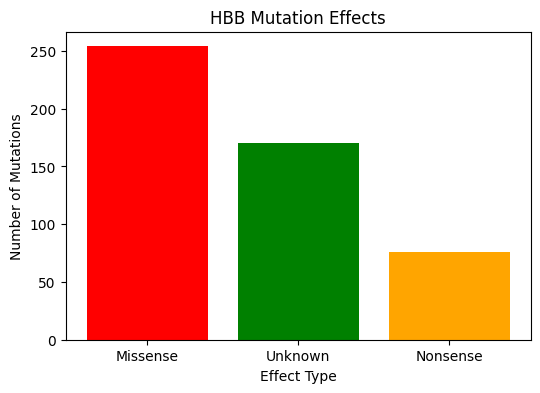

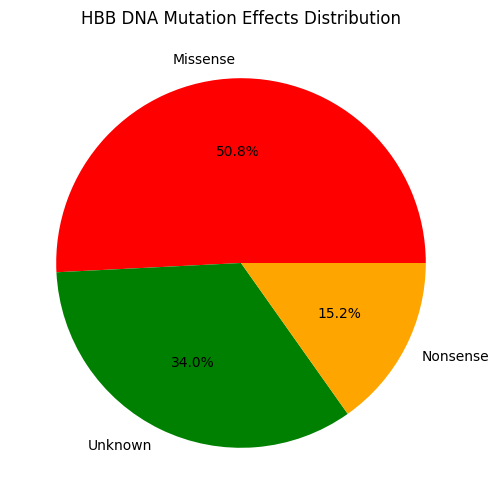

In [19]:
!pip install biopython
import Bio
print(Bio.__version__)

from Bio import SeqIO

# HBB reference sequence
record = SeqIO.read("/content/sequence (5).fasta", "fasta")
seq = record.seq
print("Sequence length:", len(seq))
import pandas as pd

# Load the mutations file as tab-separated
mutations = pd.read_csv("/content/clinvar_result (1).txt", sep='\t')
print(mutations.head())
# 'Gene(s)' column me HBB search karke filter
hbb_mutations = mutations[mutations['Gene(s)'].str.contains("HBB")]

print(hbb_mutations[['Gene(s)', 'Protein change', 'Name']].head())
hbb_mutations_clean = hbb_mutations[['Name', 'Protein change']].copy()
hbb_mutations_clean.rename(columns={'Name': 'cDNA_Change', 'Protein change': 'Protein_Change'}, inplace=True)
hbb_mutations_clean.head()
hbb_mutations_clean.to_csv("/content/hbb_mutations.csv", index=False)
hbb_mutations = mutations[mutations['Gene(s)'].str.contains("HBB")]
# Protein change mostly NaN hai, Name me cDNA ya genomic change hoga
hbb_mutations_clean = hbb_mutations[['Name', 'Protein change']].copy()
hbb_mutations_clean.rename(columns={'Name': 'cDNA_Change', 'Protein change': 'Protein_Change'}, inplace=True)

hbb_mutations_clean.head()
def classify_mutation(cDNA_change, protein_change):
    if pd.isna(protein_change) or protein_change == '-':
        # Agar protein change missing, bas cDNA change se Nonsense detect kar sakte hain
        if '*' in str(cDNA_change):
            return "Nonsense"
        else:
            return "Unknown"
    if '*' in protein_change:
        return "Nonsense"
    if protein_change.startswith('p.='):
        return "Silent"
    return "Missense"
hbb_mutations_clean['Effect'] = hbb_mutations_clean.apply(
    lambda row: classify_mutation(row['cDNA_Change'], row['Protein_Change']), axis=1
)

hbb_mutations_clean.head()
import matplotlib.pyplot as plt

# Summary table
summary = hbb_mutations_clean['Effect'].value_counts().reset_index()
summary.columns = ['Effect', 'Count']
print(summary)

# Bar graph
plt.figure(figsize=(6,4))
plt.bar(summary['Effect'], summary['Count'], color=['red','green','orange','gray'][:len(summary)])
plt.title("HBB Mutation Effects")
plt.xlabel("Effect Type")
plt.ylabel("Number of Mutations")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(summary['Count'], labels=summary['Effect'], autopct='%1.1f%%', colors=['red','green','orange','gray'][:len(summary)])
plt.title("HBB DNA Mutation Effects Distribution")
plt.show()